In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [2]:
data =pd.read_csv("gld_price_data.csv")
data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [3]:
data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.shape

(2290, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


CORREALTİON = data.corr()


<AxesSubplot:>

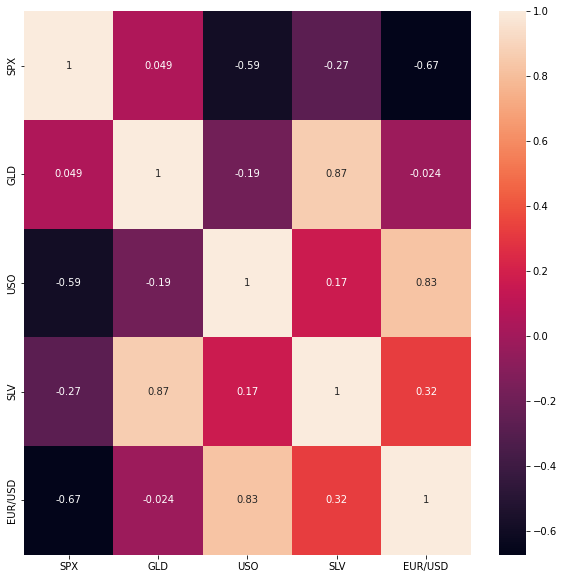

In [7]:
import seaborn as sns
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,annot=True)



In [8]:
x = data.drop(["Date","GLD"],axis=1)
y = data["GLD"]

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=2)

In [10]:
#model training
#random forrest
regression = RandomForestRegressor(n_estimators=100)
regression.fit(x_train,y_train)





RandomForestRegressor()

In [11]:
#model evulation
test_data_prediction = regression.predict(x_test)


In [12]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [13]:
print(test_data_prediction)
print(len(test_data_prediction))

[168.62460007  82.17149979 115.98110002 127.63050114 120.77630108
 154.77629802 150.15279827 126.29860058 117.48659882 125.84690101
 116.37860129 171.86080123 141.61449818 167.93599851 115.11689978
 117.4740005  137.91240325 169.96770087 159.2605036  160.31349993
 155.06029975 125.43180003 176.18430032 157.24810429 125.18640033
  93.93949971  77.0778005  120.67420013 118.99859881 167.46030031
  88.31460047 125.27040032  91.15520078 117.66790003 121.05919898
 136.2777013  115.77180121 115.05740072 146.71729952 107.046901
 104.2303025   87.02279792 126.36960055 117.88329995 153.93039916
 119.66389997 108.33479994 108.098498    93.20370023 127.18079765
  75.15900009 113.69349959 121.17009997 111.35739957 118.89949891
 120.65549976 159.31179956 166.75010143 147.32929701  85.71839838
  94.23470021  86.98369896  90.61320027 119.02520083 126.43450079
 127.49490001 169.08930046 122.31939937 117.43099907  98.68080022
 168.78000199 143.10859824 132.29710304 121.20050221 121.22509963
 119.7185007

In [14]:
# r squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print(error_score)

0.9896124897213999


In [15]:
print(y[35])
print(test_data_prediction[35])


93.389999
136.27770129999993


Text(0.5, 1.0, 'predicting value vs actual value')

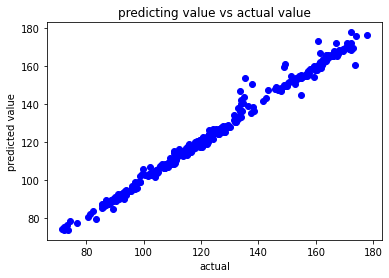

In [16]:
#actual price and predicted price
plt.scatter(y_test,test_data_prediction, color="blue")
plt.xlabel("actual")
plt.ylabel("predicted value")
plt.title("predicting value vs actual value")

In [17]:
print("predicting gold value-->",test_data_prediction[35])
print("actual gold value-->",y[35])

predicting gold value--> 136.27770129999993
actual gold value--> 93.389999
